# UberEats配達データ分析

In [487]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

In [488]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0)

In [489]:
FILE_PATH = './../data/trip_master.csv'
master = pd.read_csv(FILE_PATH, index_col='id')

In [490]:
print(len(master))
# master.head(5)

95


In [491]:
master.columns

Index(['date', 'day', 'day_of_week', 'distance', 'drive_time', 'drop_address',
       'drop_latitude', 'drop_longitude', 'drop_time', 'month',
       'pickup_address', 'pickup_latitude', 'pickup_longitude', 'pickup_time',
       'price', 'url', 'year'],
      dtype='object')

In [492]:
df = master.assign(
    pickup_datetime= master.apply(lambda x: datetime.datetime(year=x.year, month=x.month, day=x.day, 
                                                           hour=int(x.pickup_time.split(':')[0]), minute=int(x.pickup_time.split(':')[1])), axis=1),
    drop_datetime= master.apply(lambda x: datetime.datetime(year=x.year, month=x.month, day=x.day, 
                                                           hour=int(x.drop_time.split(':')[0]), minute=int(x.drop_time.split(':')[1])), axis=1),    
    shop_position_id = master.apply(lambda x: str(x.pickup_latitude) + "-" + str(x.pickup_longitude), axis=1)
                  ) .drop(['date', 'day', 'year', 'url', 'pickup_latitude', 'pickup_time', 'pickup_longitude', 'pickup_address', 
                           'day_of_week', 'pickup_time', 'drop_time', "drop_address", "drop_latitude", "drop_longitude"], axis=1)

In [493]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95 entries, d92f23b6-46a8-48d7-823c-8cadb9182193 to c5c65bca-0bf7-494f-9c3d-2cf7e7aefa2c
Data columns (total 7 columns):
distance            95 non-null float64
drive_time          95 non-null float64
month               95 non-null int64
price               95 non-null int64
pickup_datetime     95 non-null datetime64[ns]
drop_datetime       95 non-null datetime64[ns]
shop_position_id    95 non-null object
dtypes: datetime64[ns](2), float64(2), int64(2), object(1)
memory usage: 5.9+ KB


In [497]:
df['date'] = df['pickup_datetime'].dt.date
df['day_of_week_num'] = df['pickup_datetime'].dt.dayofweek
df['day_of_week'] = df['pickup_datetime'].dt.weekday_name
df['month_day_num'] = df['pickup_datetime'].dt.day
df["hour_of_day"] = df['pickup_datetime'].dt.hour
df["week_of_month"] = df['pickup_datetime'].dt.week

In [498]:
df.head(3)

,distance,drive_time,month,price,pickup_datetime,drop_datetime,shop_position_id,date,day_of_week_num,day_of_week,month_day_num,hour_of_day,week_of_month
id,,,,,,,,,,,,,
d92f23b6-46a8-48d7-823c-8cadb9182193,0.51,7.6,12,401,2019-12-26 13:52:00,2019-12-26 14:07:00,35.58022689819336-139.66342163085938,2019-12-26,3,Thursday,26,13,52
d9401bf2-68ed-42ee-8325-1f2698c1e86f,3.59,27.6,12,584,2019-12-26 17:12:00,2019-12-26 17:42:00,35.565433502197266-139.65289306640622,2019-12-26,3,Thursday,26,17,52
8cd65eff-a081-47ee-a6e1-82ebc00f066a,2.29,26.1,12,666,2019-12-26 12:58:00,2019-12-26 13:34:00,35.5733528137207-139.65725708007812,2019-12-26,3,Thursday,26,12,52


## 毎日のデータ集計

In [511]:
# target_day = datetime.datetime(2019, 12, 29).date()
target_day = datetime.datetime.today().date()
df_day = df[df["date"] == target_day]

In [512]:
df_day

,distance,drive_time,month,price,pickup_datetime,drop_datetime,shop_position_id,date,day_of_week_num,day_of_week,month_day_num,hour_of_day,week_of_month
id,,,,,,,,,,,,,
2131607a-1bfd-4229-8d38-3711bfbcd0ed,1.01,10.2,12,497,2019-12-30 19:23:00,2019-12-30 19:37:00,nan-nan,2019-12-30,0,Monday,30,19,1
e6b6d8cb-24e8-4651-bc7a-0abc32687fad,1.21,16.8,12,398,2019-12-30 18:06:00,2019-12-30 18:23:00,35.5811767578125-139.64138793945312,2019-12-30,0,Monday,30,18,1
1822f867-b243-4833-a212-4e07aa5f9ad4,1.46,17.5,12,411,2019-12-30 14:58:00,2019-12-30 15:18:00,35.58122634887695-139.64138793945312,2019-12-30,0,Monday,30,14,1
065768b0-adfd-47bd-95f7-9159907fbb42,2.24,28.8,12,453,2019-12-30 18:27:00,2019-12-30 18:59:00,35.57698440551758-139.65109252929688,2019-12-30,0,Monday,30,18,1
5c50fa0d-de58-4414-86ad-8ee44cb1b6b2,0.51,8.2,12,361,2019-12-30 17:51:00,2019-12-30 18:01:00,35.58118057250977-139.64132690429688,2019-12-30,0,Monday,30,17,1
4b01426d-2c2a-4d68-a411-461c2f0991b5,1.34,18.1,12,405,2019-12-30 17:12:00,2019-12-30 17:32:00,nan-nan,2019-12-30,0,Monday,30,17,1
c5c65bca-0bf7-494f-9c3d-2cf7e7aefa2c,1.01,11.7,12,387,2019-12-30 20:01:00,2019-12-30 20:16:00,35.58169937133789-139.64125061035156,2019-12-30,0,Monday,30,20,1


In [513]:
drive_count = len(df_day)
drive_hours = round(df_day["drive_time"].sum() / 60, 1)
drive_length = round(df_day["distance"].sum() , 2)
total_price = df_day["price"].sum()

In [515]:
print("{}  配達件数: {}件, 配達時間: {}h, 配達距離: {}km, 配達報酬: {}円".format(target_day, drive_count, drive_hours, drive_length, total_price))

2019-12-30  配達件数: 7件, 配達時間: 1.9h, 配達距離: 8.78km, 配達報酬: 2912円


## 日別の集計

In [516]:
groupby = df.groupby('date')

In [517]:
df_by_day = pd.DataFrame()
df_by_day["配達件数"] = groupby["pickup_datetime"].count()
df_by_day["配達時間(h)"] = round(groupby["drive_time"].sum() / 60, 1)
df_by_day["配達距離(km)"] = groupby["distance"].sum()
df_by_day["配達報酬(円)"] = groupby["price"].sum()
df_by_day["ロングドロップ"] = groupby.apply(lambda x: x[x.distance >= 2]['distance'].count())

In [518]:
df_by_day.index.name = '月日'
df_by_day.tail(30)

,配達件数,配達時間(h),配達距離(km),配達報酬(円),ロングドロップ
月日,,,,,
2019-12-11,2,1.1,4.41,902,1
2019-12-12,3,1.2,4.75,1254,1
2019-12-13,7,2.7,14.01,3223,3
2019-12-15,9,3.6,12.91,4559,2
2019-12-16,7,2.1,6.48,3119,0
2019-12-17,3,1.5,5.29,1588,1
2019-12-18,7,3.4,18.90,3570,4
2019-12-19,11,4.0,24.32,5492,6
2019-12-24,11,3.6,15.82,5341,0


## 週別の集計

In [519]:
groupby = df.groupby('week_of_month')

In [520]:
df_by_week = pd.DataFrame()
df_by_week["配達件数"] = groupby["pickup_datetime"].count()
df_by_week["配達時間(h)"] = round(groupby["drive_time"].sum() / 60, 1)
df_by_week["配達距離(km)"] = groupby["distance"].sum()
df_by_week["配達報酬(円)"] = groupby["price"].sum()
df_by_week["ロングドロップ"] = groupby.apply(lambda x: x[x.distance >= 2]['distance'].count())

In [521]:
df_by_week.index.name = '週番号'
df_by_week.tail(30)

,配達件数,配達時間(h),配達距離(km),配達報酬(円),ロングドロップ
週番号,,,,,
1,7,1.9,8.78,2912,1
50,21,8.5,36.08,9938,7
51,28,11.0,54.99,13769,11
52,39,10.6,61.73,19793,7


## 月別の集計

In [522]:
groupby = df.groupby('month')
df_by_month = pd.DataFrame()
df_by_month["配達件数"] = groupby["pickup_datetime"].count()
df_by_month["配達時間(h)"] = round(groupby["drive_time"].sum() / 60, 1)
df_by_month["配達距離(km)"] = groupby["distance"].sum()
df_by_month["配達報酬(円)"] = groupby["price"].sum()
df_by_month["ロングドロップ"] = groupby.apply(lambda x: x[x.distance >= 2]['distance'].count())

In [523]:
df_by_month.index.name = '月'
df_by_month

,配達件数,配達時間(h),配達距離(km),配達報酬(円),ロングドロップ
月,,,,,
12,95,31.9,161.58,46412,26


## 全データ分析

Text(0.5, 1.0, '曜日ごとの配達回数')

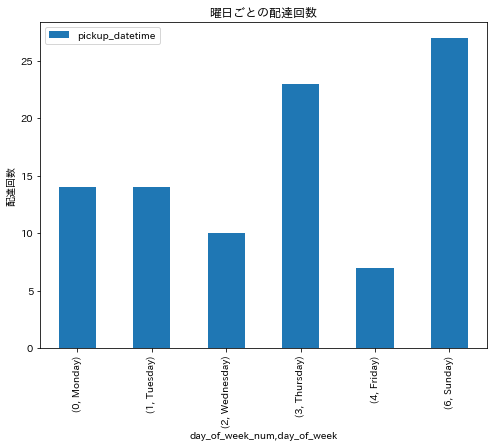

In [524]:
uber_weekdays = df.pivot_table(index=['day_of_week_num','day_of_week'],
                                  values='pickup_datetime',
                                  aggfunc='count')
uber_weekdays.plot(kind='bar')
plt.ylabel('配達回数')
plt.title('曜日ごとの配達回数')

Text(0.5, 1.0, '日にちごとの配達回数')

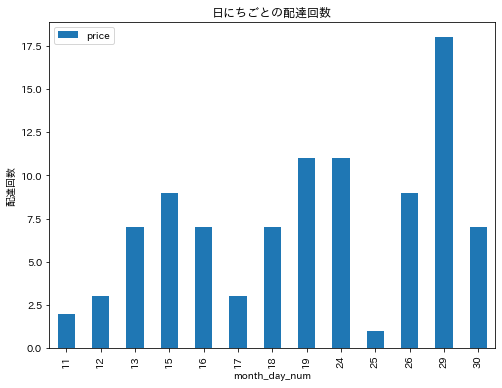

In [525]:
uber_monthdays = df.pivot_table(index=['month_day_num'],
                                  values='price',
                                  aggfunc='count')
uber_monthdays.plot(kind='bar')
plt.ylabel('配達回数')
plt.title('日にちごとの配達回数')

Text(0.5, 1.0, '時間ごとの配達回数')

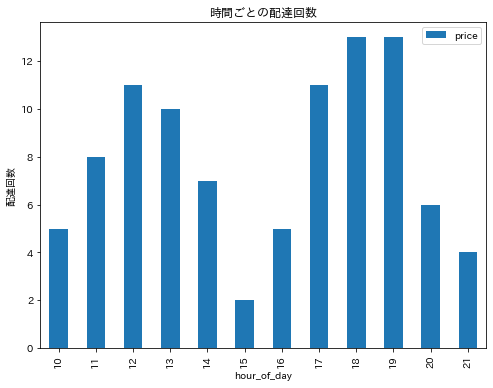

In [526]:
uber_hour = df.pivot_table(index=['hour_of_day'],
                                  values='price',
                                  aggfunc='count')
uber_hour.plot(kind='bar')
plt.ylabel('配達回数')
plt.title('時間ごとの配達回数')

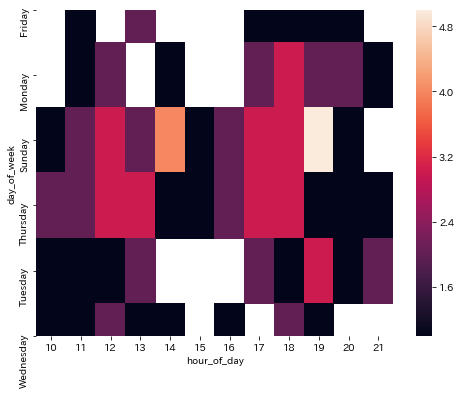

In [527]:
def count_rows(rows):
    return len(rows)

by_cross = df.groupby('day_of_week hour_of_day'.split()).apply(count_rows).unstack()
sns.heatmap(by_cross)